In [2]:
import sys
from scipy.optimize import linear_sum_assignment
from matplotlib.lines import Line2D

sys.path.append("..")
from src import *

A matching Triton is not available, some optimizations will not be enabled
Traceback (most recent call last):
  File "c:\Users\MrPio\AppData\Local\Programs\Python\Python310\lib\site-packages\xformers\__init__.py", line 57, in _is_triton_available
    import triton  # noqa
ModuleNotFoundError: No module named 'triton'


Cupy Available= 0


## Check that everything is ok

100%|██████████| 11/11 [00:11<00:00,  1.04s/it]


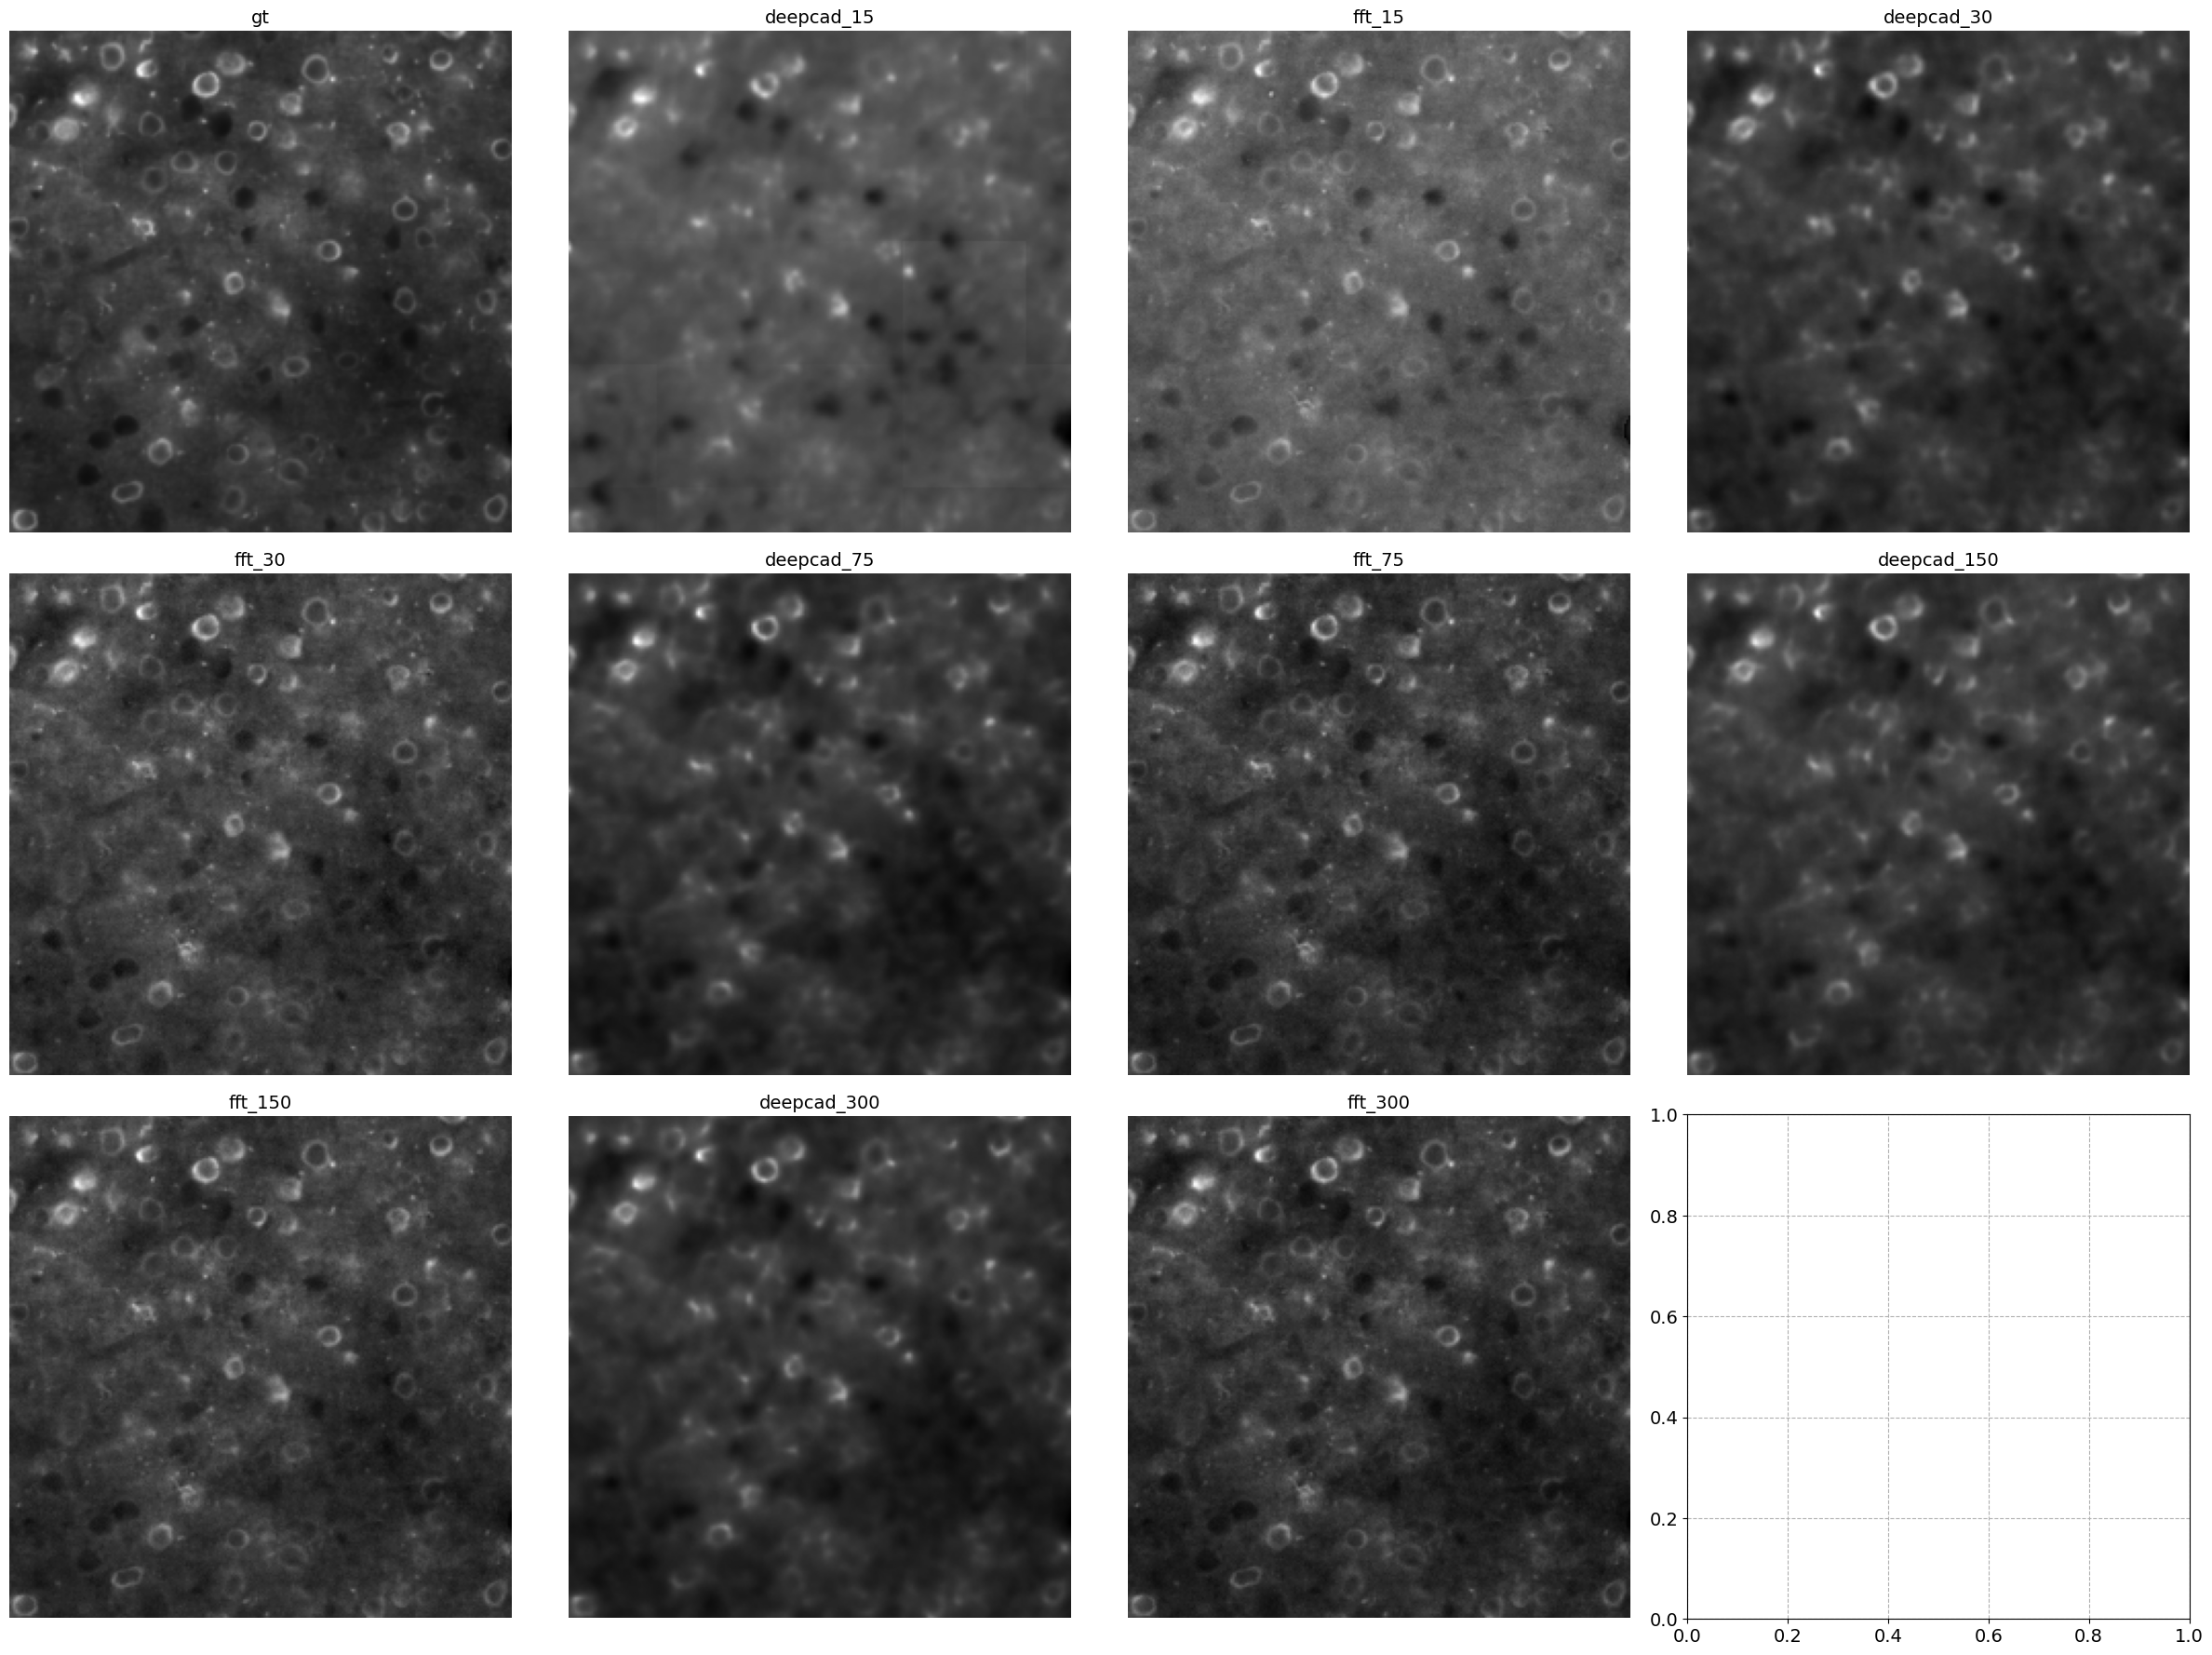

In [2]:
dataset = "synthetic"
folders = [
    "gt",
    "deepcad_15",
    "fft_15",
    "deepcad_30",
    "fft_30",
    "deepcad_75",
    "fft_75",
    "deepcad_150",
    "fft_150",
    "deepcad_300",
    "fft_300",
]
imgs = {}
for folder in tqdm(folders):
    data_path = f"dataset/synthetic/{folder}/data.tiff"
    rec = Recording(data_path, max_frames=10)
    imgs[folder] = rec.np[-1]
imshow(imgs, size=6, zoom=2, cols=4)

## Plotting metrics

In [6]:
def barchart(baseline_df, df, label, col, lims=(0, 1), width=0.75, line_y=None):
    fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=300)

    ax.bar(baseline_df.index, baseline_df[col], label="DeepCAD", color="lightgray", width=width)

    diff = df[col] - baseline_df[col]
    colors = np.where(diff < 0, "salmon", "steelblue")

    ax.bar(
        df.index,
        diff,
        bottom=baseline_df[col],
        label=label,
        color=colors,
        width=width,
    )

    ax.set_ylim(lims)
    ax.set_title(f"{col} comparison")
    ax.set_xlabel("Method")
    ax.set_ylabel(col)
    ax.legend()
    if line_y:
        ax.add_line(Line2D([-1, 5], [line_y] * 2, linestyle="--", color="tab:blue", linewidth=2))
    plt.tight_layout()
    plt.show()

In [7]:
metrics=pd.read_csv("cellpose_metrics.csv")
metrics

,suffx,ROI GT,ROIs,IoU
0,synthetic_deepcad_15,284.0,101.0,0.267517
1,synthetic_deepcad_150,284.0,192.0,0.462333
2,synthetic_fft_15,284.0,232.0,0.685405
3,synthetic_fft_150,284.0,242.0,0.697820
4,synthetic_deepcad_30,284.0,170.0,0.435010
5,synthetic_fft_30,284.0,240.0,0.729286
6,synthetic_deepcad_75,284.0,188.0,0.453127
7,synthetic_fft_75,284.0,235.0,0.698760
8,synthetic_deepcad_300,284.0,183.0,0.456118
9,synthetic_fft_300,284.0,239.0,0.711500


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


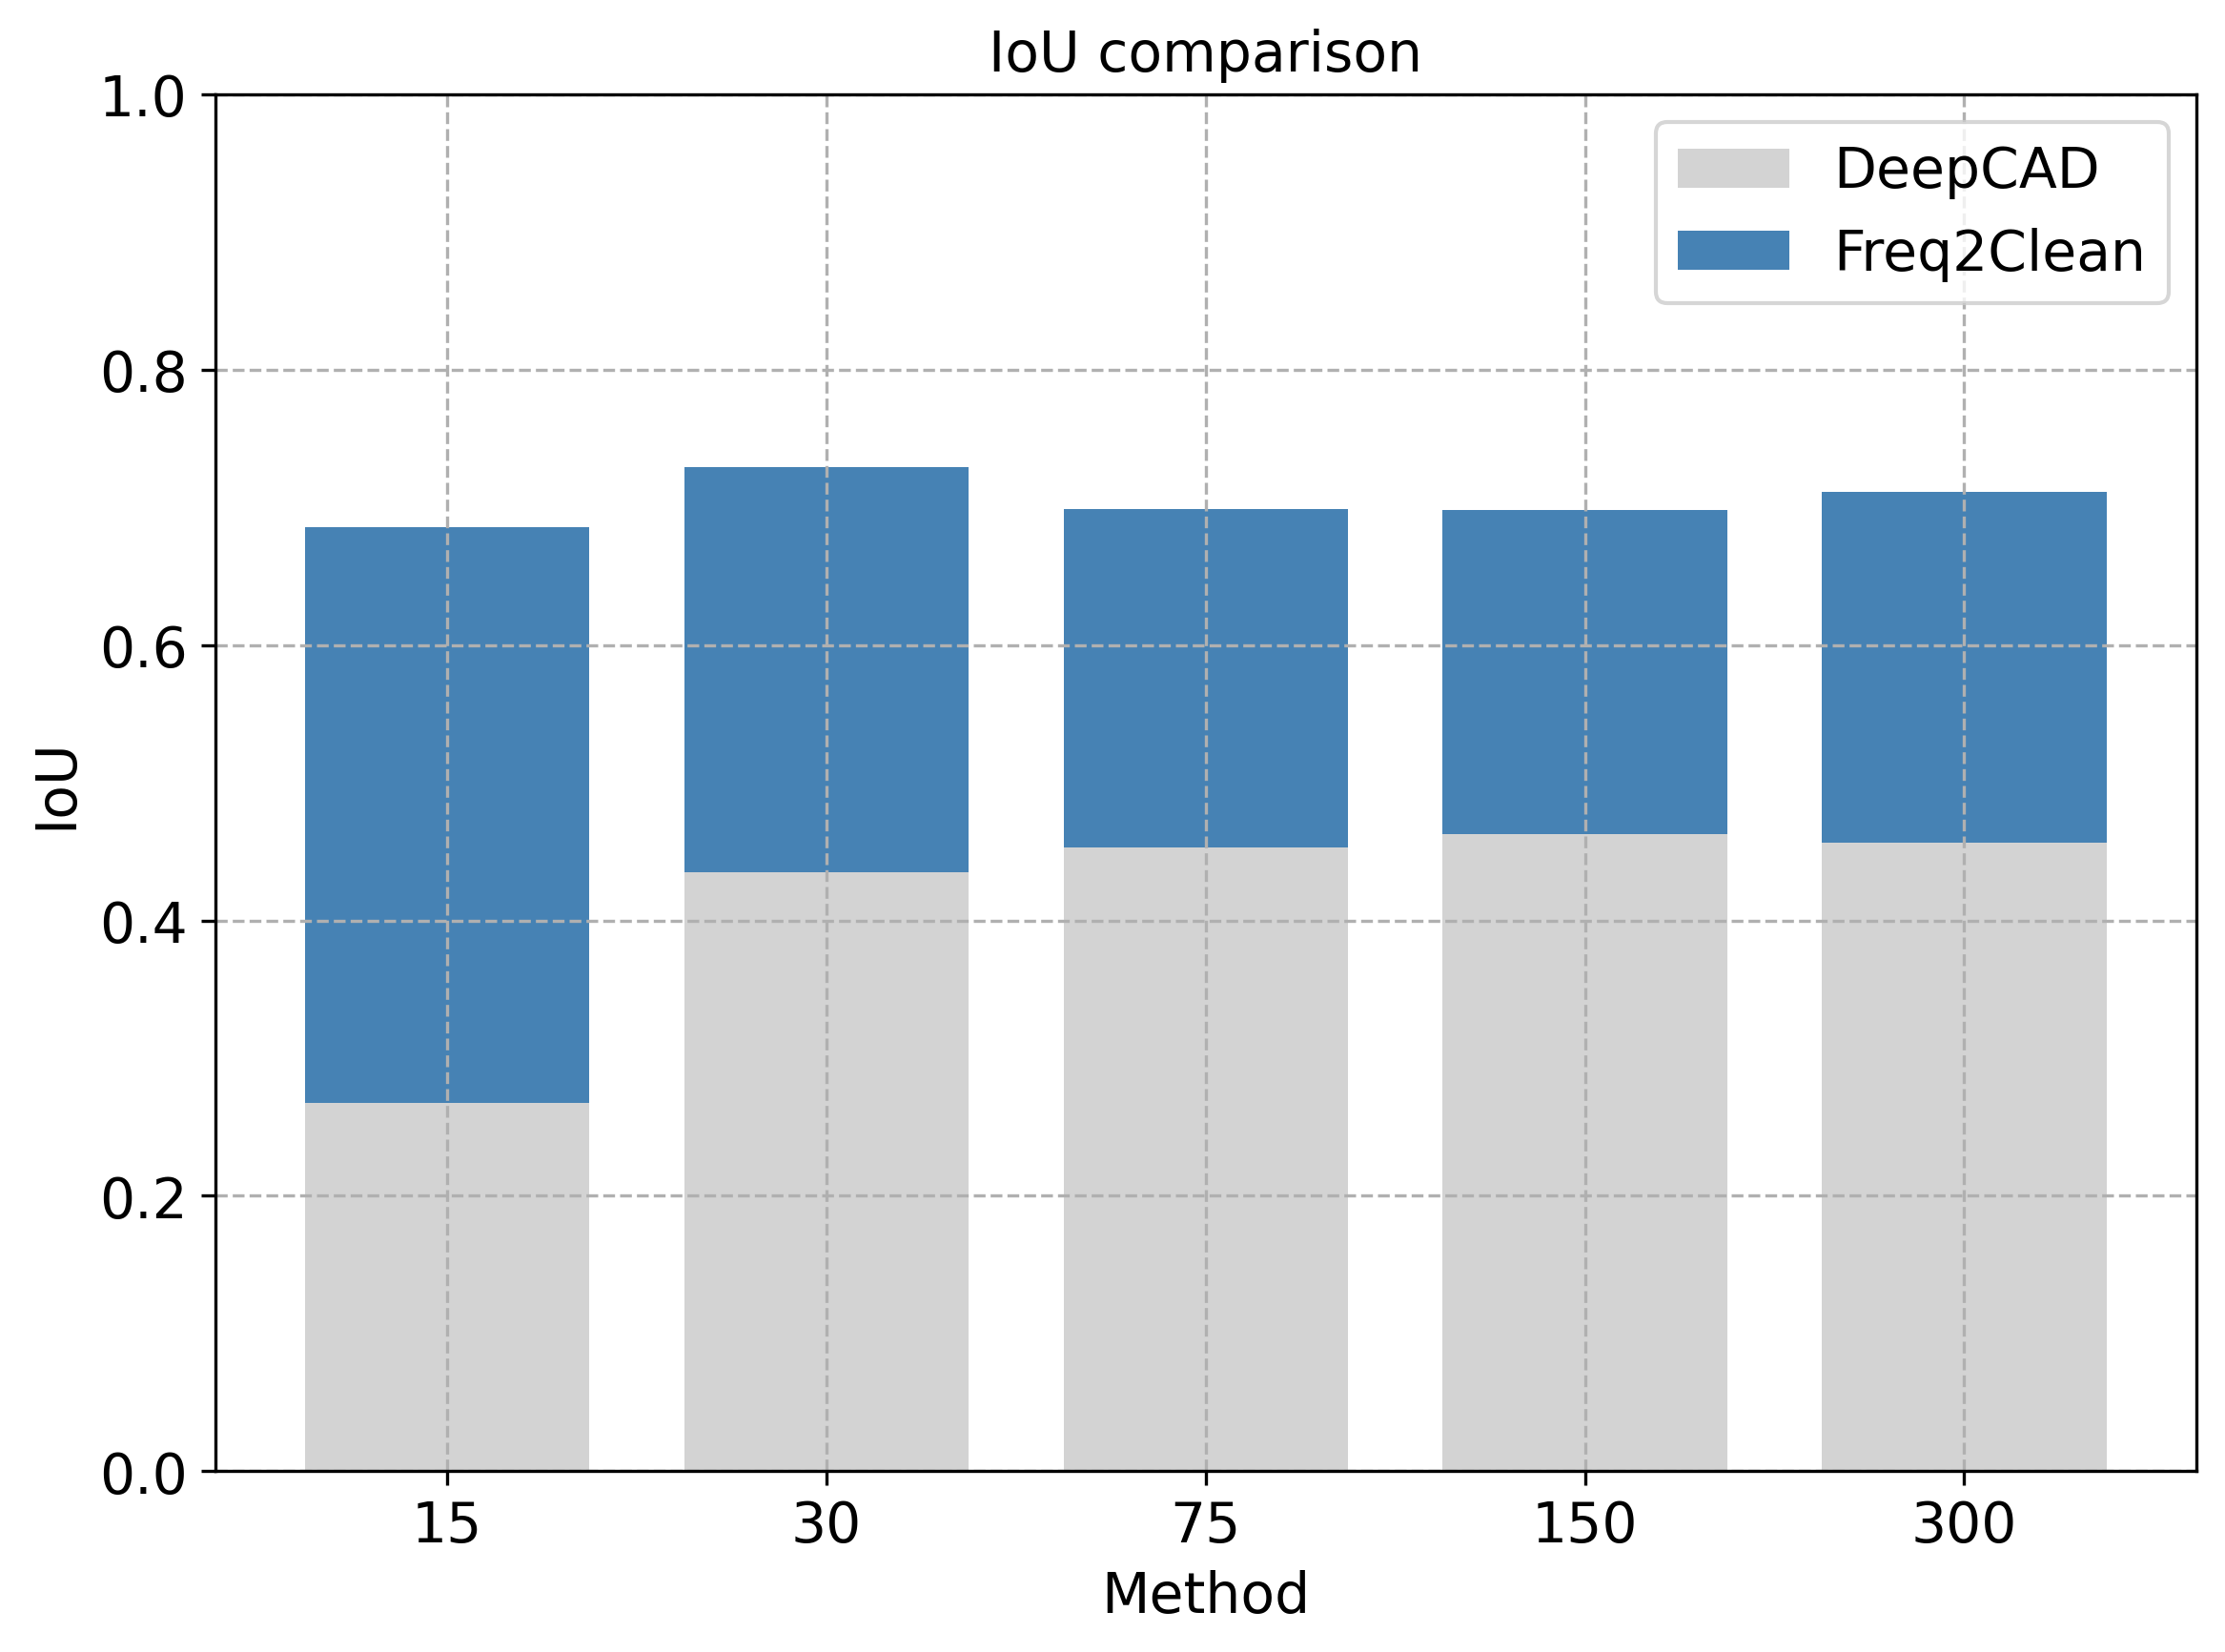

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


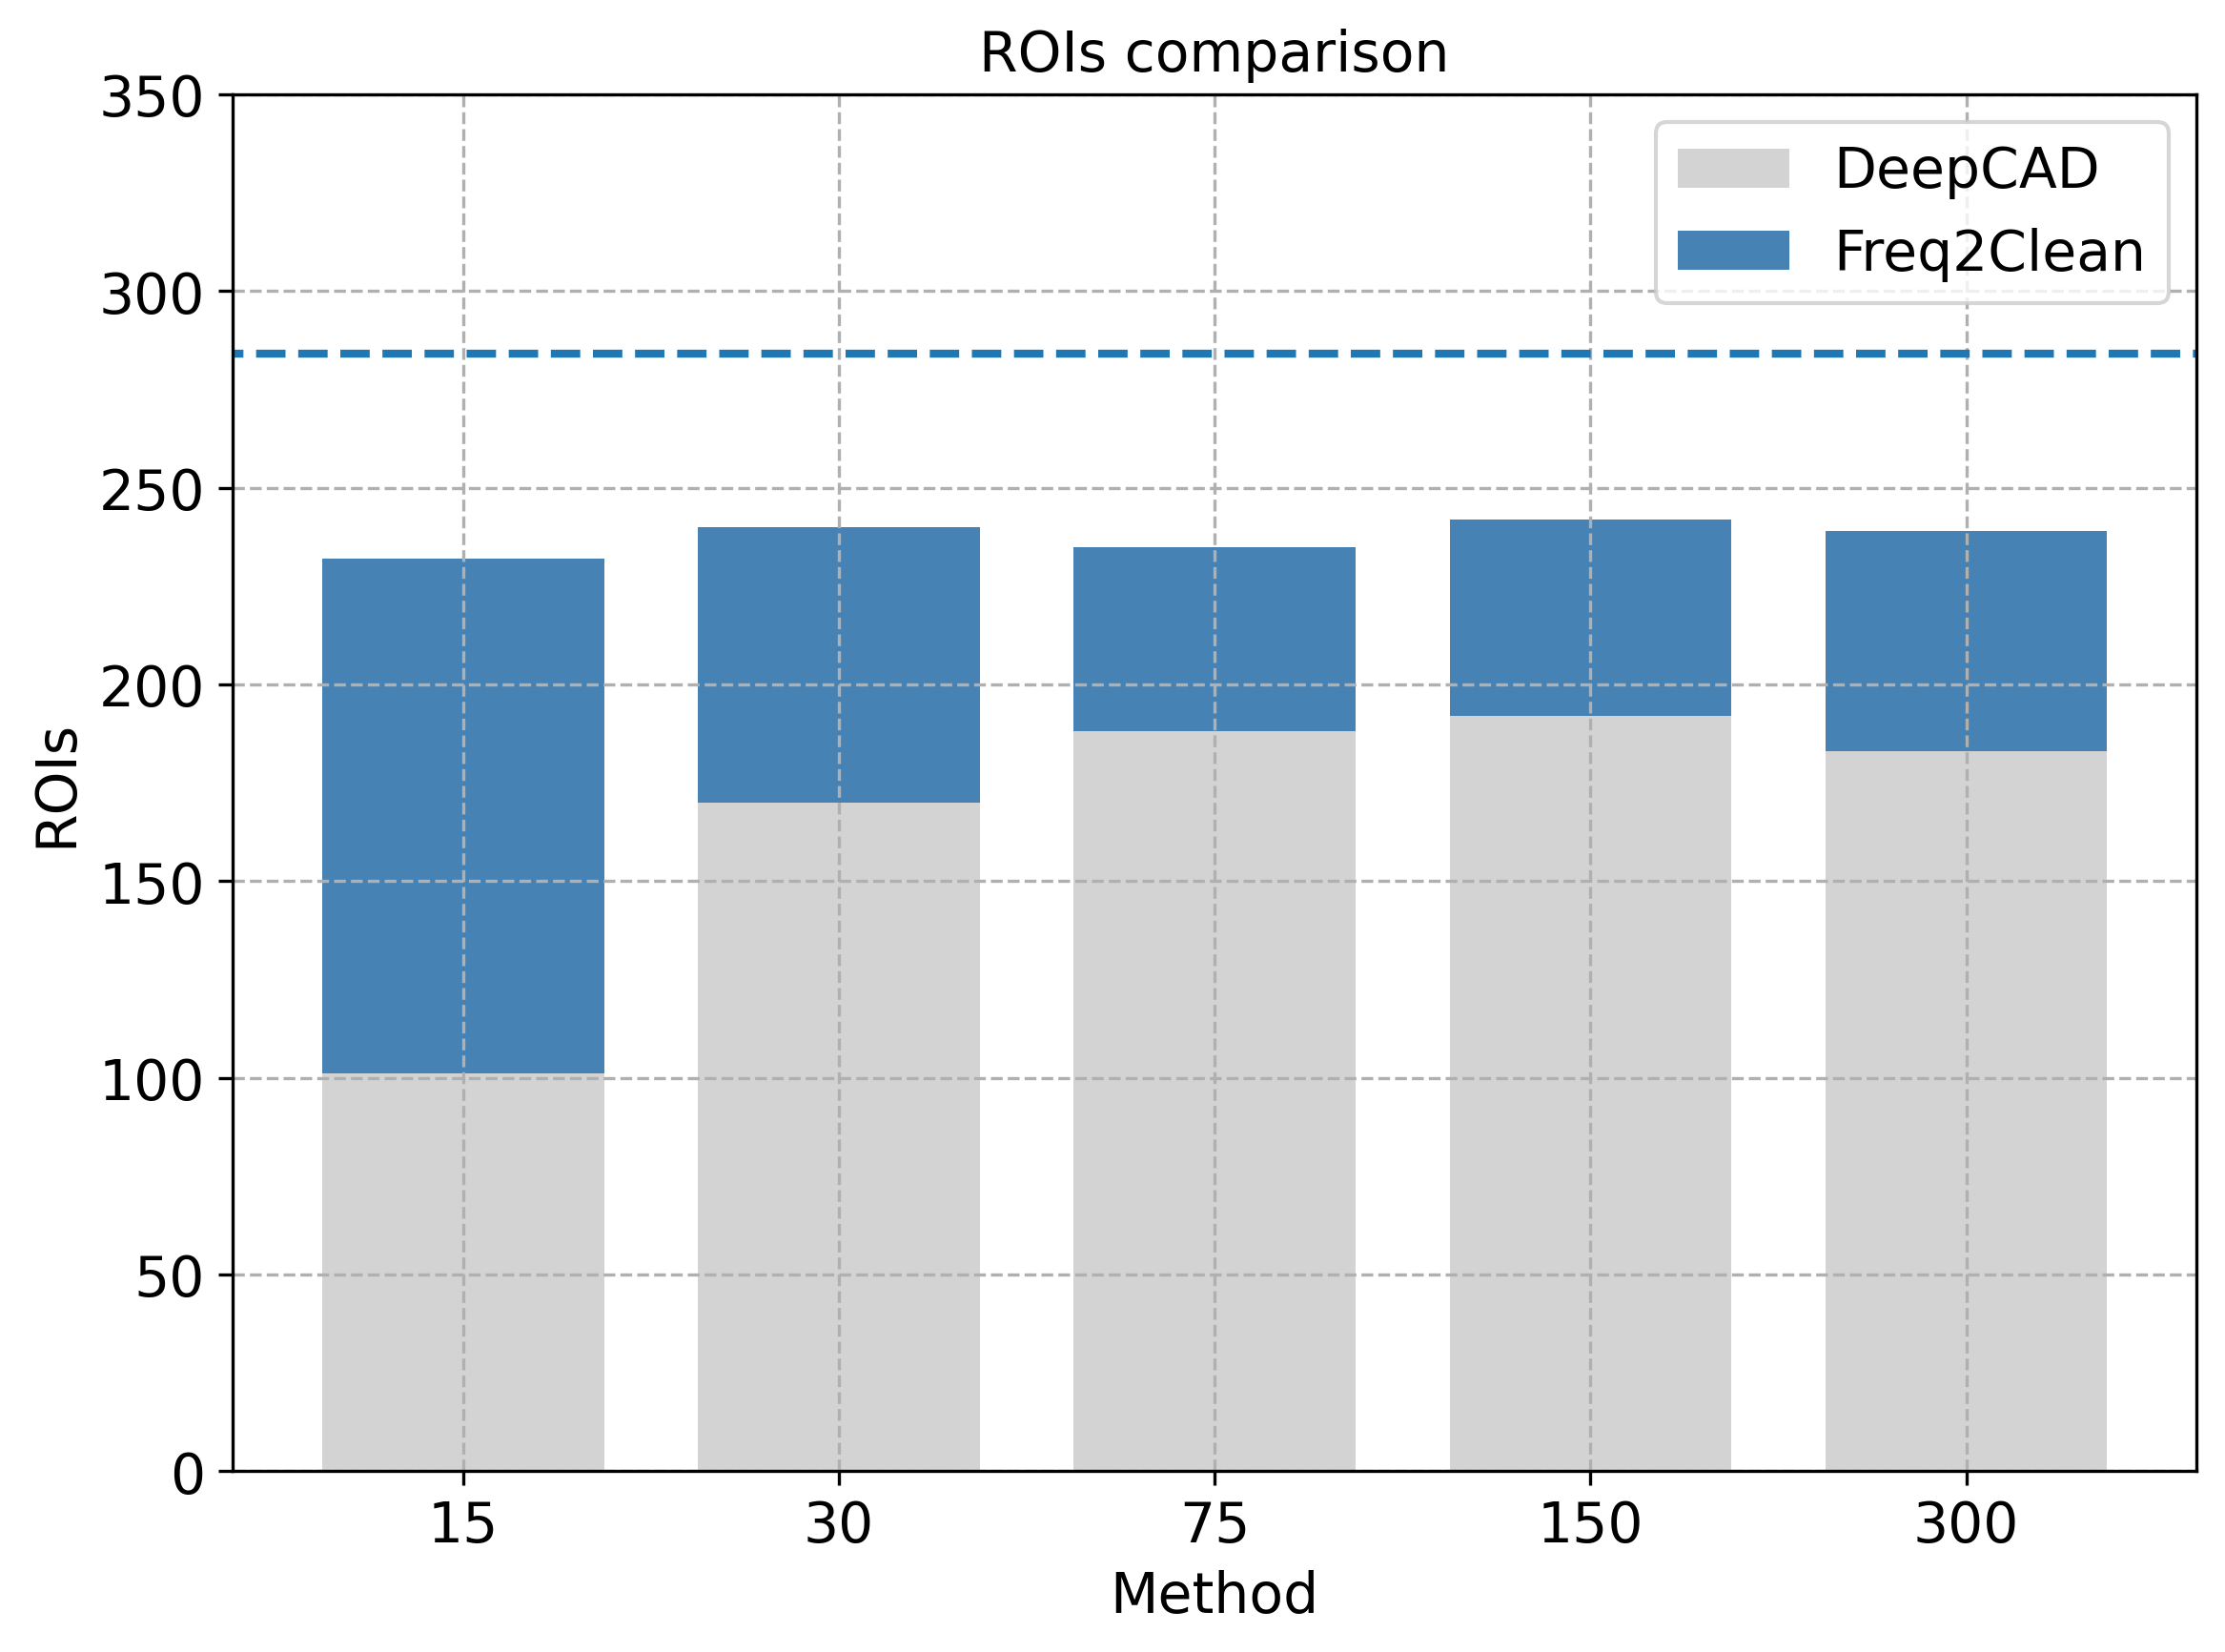

In [8]:
fft_df = pd.DataFrame(
    [
        ("15", 0.685405, 232.0),
        ("30", 0.729286, 240.0),
        ("75", 0.698760, 235.0),
        ("150", 0.697820, 242.0),
        ("300", 0.711500, 239.0),
    ],
    columns=["Method", "IoU", "ROIs"],
).set_index("Method")

deepcad_df = pd.DataFrame(
    [
        ("15", 0.267517, 101.0),
        ("30", 0.435010, 170.0),
        ("75", 0.453127, 188.0),
        ("150", 0.462333, 192.0),
        ("300", 0.456118, 183.0),
    ],
    columns=["Method", "IoU", "ROIs"],
).set_index("Method")
barchart(deepcad_df, fft_df,"Freq2Clean","IoU")
barchart(deepcad_df, fft_df,"Freq2Clean","ROIs",lims=(0,350), line_y=284)